<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [8]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy

#### Read the dataset in the csv file from the URL


In [ ]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Load and Explore the Dataset

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset from provided URL
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Preview the dataset
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 2: Generate Descriptive Statistics and Visualizations

In [13]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load dataset again (if needed)
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Display first few rows to confirm structure
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 1. Boxplot of Median Value of Owner-Occupied Homes (MEDV)

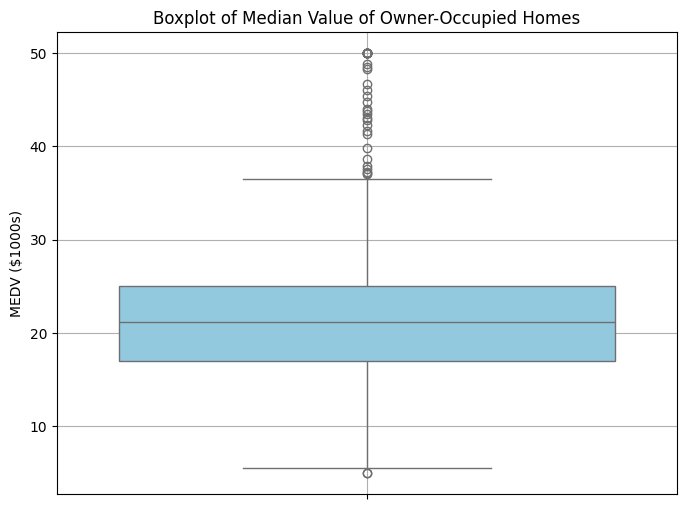

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df, color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV ($1000s)')
plt.grid(True)
plt.show()


####  2. Bar Plot for Charles River Variable (CHAS)

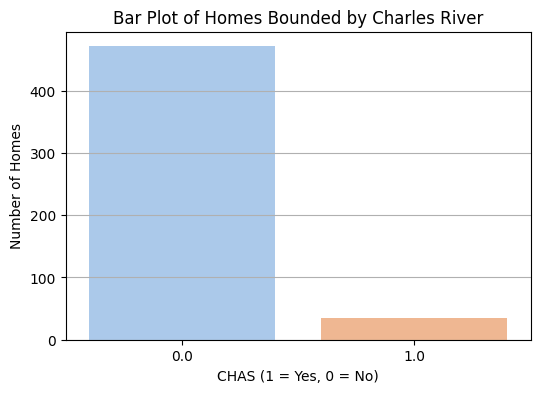

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='pastel')
plt.title('Bar Plot of Homes Bounded by Charles River')
plt.xlabel('CHAS (1 = Yes, 0 = No)')
plt.ylabel('Number of Homes')
plt.grid(True, axis='y')
plt.show()


#### 3. Boxplot: MEDV vs Discretized AGE Groups

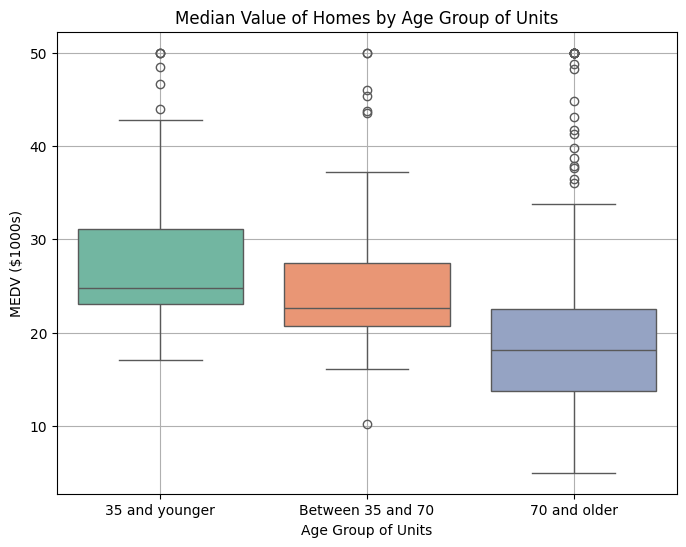

In [16]:
# Discretize AGE into bins
bins = [0, 35, 70, 100]
labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')
plt.title('Median Value of Homes by Age Group of Units')
plt.xlabel('Age Group of Units')
plt.ylabel('MEDV ($1000s)')
plt.grid(True)
plt.show()


#### 4. Scatter Plot: NOX vs INDUS

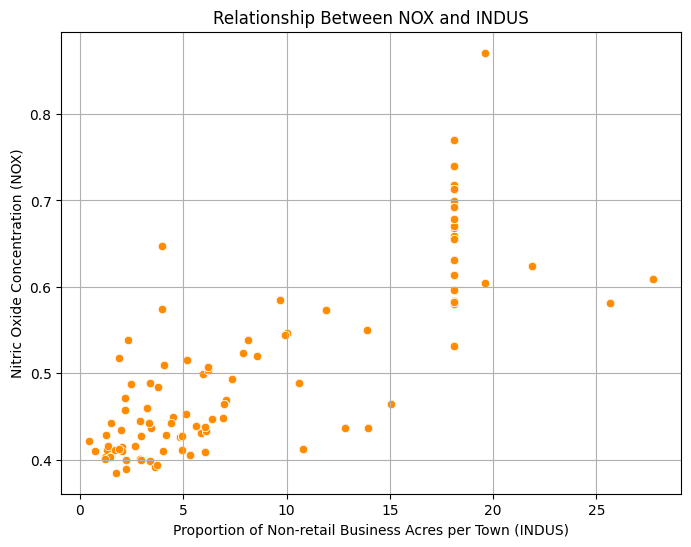

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='darkorange')
plt.title('Relationship Between NOX and INDUS')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.grid(True)
plt.show()


#### 5. Histogram: Pupil-Teacher Ratio (PTRATIO)

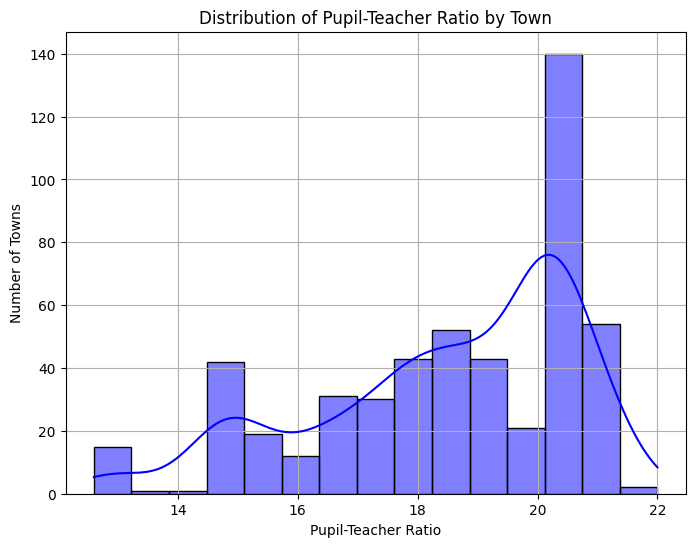

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='blue')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Number of Towns')
plt.grid(True)
plt.show()


### Task 3: Use the appropriate tests to answer the questions provided.

In [20]:
# Import required statistical libraries
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


#### 1. T-Test: Is there a significant difference in MEDV for homes near Charles River?
#### Hypotheses:
#### H₀: There is no significant difference in median value (MEDV) of houses bounded by the Charles River.

#### H₁: There is a significant difference in MEDV of houses bounded by the Charles River.

In [21]:
# Separate the groups
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(river_yes, river_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in house values.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference found.")


T-statistic: 3.1133
P-value: 0.0036
Conclusion: Reject the null hypothesis. There is a significant difference in house values.


#### 2. ANOVA: Difference in MEDV across AGE groups
#### Hypotheses:
#### H₀: There is no difference in MEDV across the different AGE groups.

#### H₁: There is a difference in MEDV across at least one AGE group.

In [22]:
# Reuse the AGE_GROUP from earlier
group1 = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

# Perform ANOVA
f_stat, p_val = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between AGE groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference found between AGE groups.")


F-statistic: 36.4076
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant difference between AGE groups.


#### 3. Pearson Correlation: NOX and INDUS
#### Hypotheses:
#### H₀: There is no linear relationship between NOX and INDUS.

#### H₁: There is a linear relationship between NOX and INDUS.

In [23]:
# Pearson correlation
corr_coeff, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coeff:.4f}")
print(f"P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. A significant linear relationship exists.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship found.")


Pearson correlation coefficient: 0.7637
P-value: 0.0000
Conclusion: Reject the null hypothesis. A significant linear relationship exists.


#### 4. Regression Analysis: DIS (distance to employment centers) on MEDV
#### Hypotheses:
#### H₀: The weighted distance (DIS) has no impact on MEDV.

#### H₁: DIS has a significant impact on MEDV.

In [24]:
# Simple linear regression using statsmodels
model = smf.ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        14:00:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0